<a href="https://colab.research.google.com/github/Kshitij0412/ML-projects/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-03-23 17:09:26--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-03-23 17:09:26 (104 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
df = dataset

In [ ]:
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [ ]:
test_dataset = dataset.sample(frac=0.2)
print('len test_dataset =', len(test_dataset))
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
print('len train_dataset =', len(train_dataset))

len test_dataset = 268
len train_dataset = 1070


In [ ]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

0    16884.92
1     1725.55
2     4449.46
4     3866.86
5     3756.62
Name: expenses, dtype: float64

In [ ]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,0.0,0.0
1,18.0,1.0,33.8,1.0,1.0,1.0
2,28.0,1.0,33.0,3.0,1.0,1.0
4,32.0,1.0,28.9,0.0,1.0,2.0
5,31.0,0.0,25.7,0.0,1.0,1.0


In [ ]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

131     13616.36
332     13429.04
311      1737.38
858     18218.16
1145    11289.11
Name: expenses, dtype: float64

In [ ]:
test_dataset.head()


,age,sex,bmi,children,smoker,region
131,61,0,22.0,0,1,3
332,61,0,31.2,0,1,2
311,19,0,24.7,0,1,0
858,25,0,32.2,1,1,1
1145,52,1,32.8,3,1,2


In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_10 (Dense)            (None, 64)                448       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3086 (12.06 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 13 (56.00 Byte)
__________________

In [ ]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.2,
)

print(history)

Epoch 1/100
27/27 [==============================] - 1s 11ms/step - loss: 13047.0000 - mae: 13047.0000 - mse: 309435520.0000 - val_loss: 13017.4951 - val_mae: 13017.4951 - val_mse: 313813792.0000
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 11611.2656 - mae: 11611.2656 - mse: 272645568.0000 - val_loss: 9448.2432 - val_mae: 9448.2432 - val_mse: 220901376.0000
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 7383.6968 - mae: 7383.6968 - mse: 146447440.0000 - val_loss: 6061.5884 - val_mae: 6061.5884 - val_mse: 125189816.0000
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 4584.1909 - mae: 4584.1909 - mse: 86945336.0000 - val_loss: 3976.6775 - val_mae: 3976.6775 - val_mse: 62755868.0000
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 3574.8330 - mae: 3574.8330 - mse: 49406740.0000 - val_loss: 3627.3154 - val_mae: 3627.3154 - val_mse: 47408396.0000
Epoch 6/100
27/27 [=======================

9/9 - 0s - loss: 1900.0717 - mae: 1900.0717 - mse: 23689432.0000 - 50ms/epoch - 6ms/step
Testing set Mean Abs Error: 1900.07 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


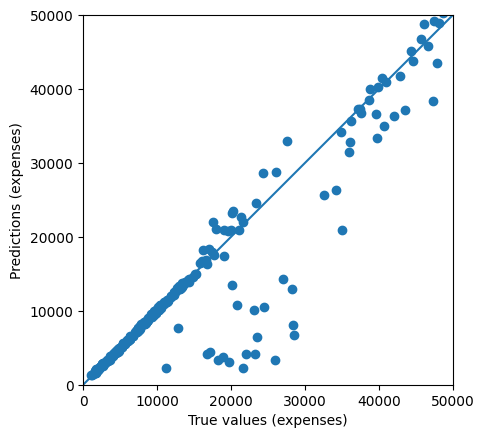

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
